In [1]:
%pip install seaborn

import sys
import os
sys.path.append(os.path.abspath('../src'))

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform
import joblib

from utils import load_data, preprocess_data, custom_scorer, train_and_evaluate_model, plot_feature_importance, plot_confusion_matrix

In [3]:
# Load data for each feature set
feature_sets = ['../Data/Features/Random_Forest.csv', '../Data/Features/RF_MI_Union.csv', 
                '../Data/Features/RF_MI_Intersection.csv',
                '../Data/Features/NSCLC_biomarkers_de_analysis.csv', 
                '../Data/Features/NSCLC_biomarkers_50_de_analysis.csv',
               '../Data/Features/RF_MI_DE_Union.csv']

expression_path = '../Data/Processed/NSCLC_expression_model_training.csv'
labels_path = '../Data/Processed/NSCLC_labels_model_training.csv'

Processing feature set: ../Data/Features/Random_Forest.csv
Initial model performance:
Accuracy: 0.9640
AUC-ROC: 0.9983
Cross-validation scores: 0.9538 (+/- 0.0229)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.96      0.96      0.96       100
           2       1.00      1.00      1.00        14

    accuracy                           0.96       222
   macro avg       0.97      0.97      0.97       222
weighted avg       0.96      0.96      0.96       222

Best parameters found: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 3, 'class_weight': 'balanced', 'C': 10}

Tuned model performance:
Accuracy: 0.9685
AUC-ROC: 0.9954
Cross-validation scores: 0.9493 (+/- 0.0187)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.96      0.97      0.97       100
           2       1.00      1

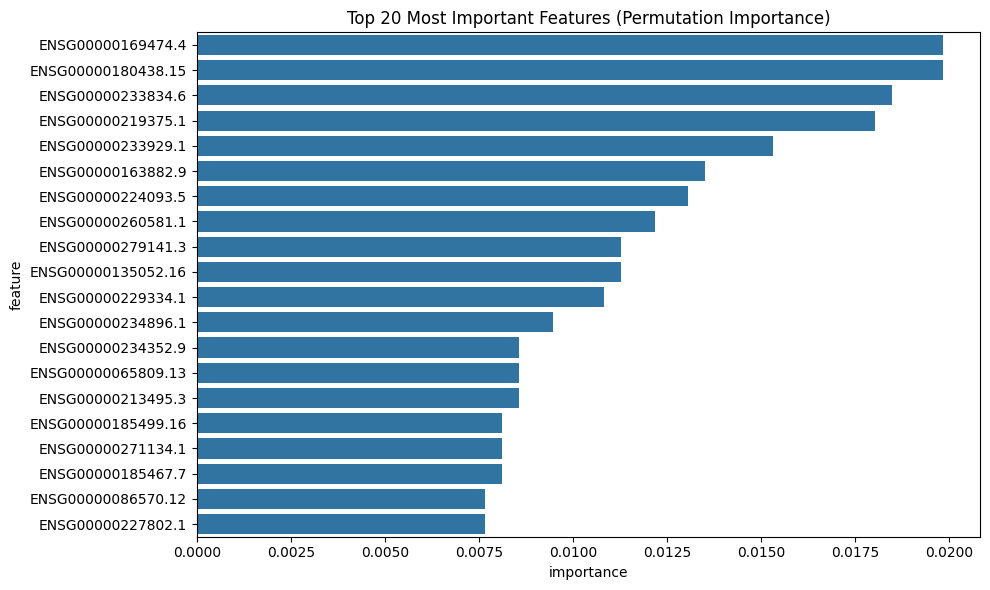

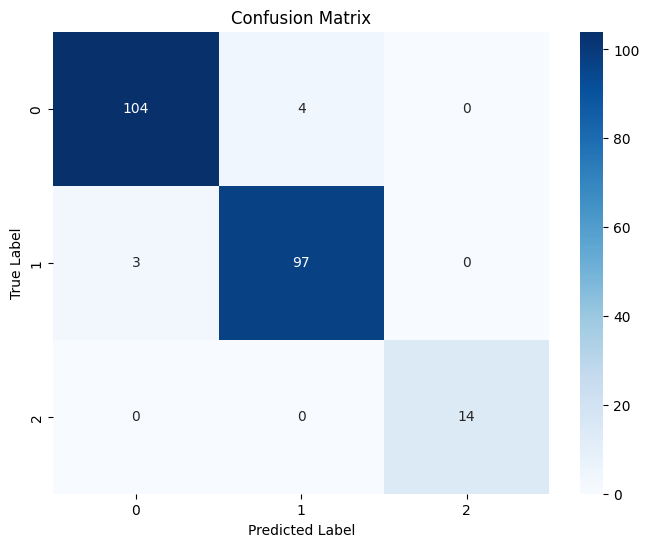

Processing feature set: ../Data/Features/RF_MI_Union.csv
Initial model performance:
Accuracy: 0.9730
AUC-ROC: 0.9984
Cross-validation scores: 0.9527 (+/- 0.0152)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.98      0.96      0.97       100
           2       1.00      1.00      1.00        14

    accuracy                           0.97       222
   macro avg       0.98      0.98      0.98       222
weighted avg       0.97      0.97      0.97       222

Best parameters found: {'kernel': 'linear', 'gamma': 1, 'degree': 2, 'class_weight': 'balanced', 'C': 0.1}

Tuned model performance:
Accuracy: 0.9595
AUC-ROC: 0.9972
Cross-validation scores: 0.9549 (+/- 0.0141)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       108
           1       0.94      0.97      0.96       100
           2       1.00      1.00

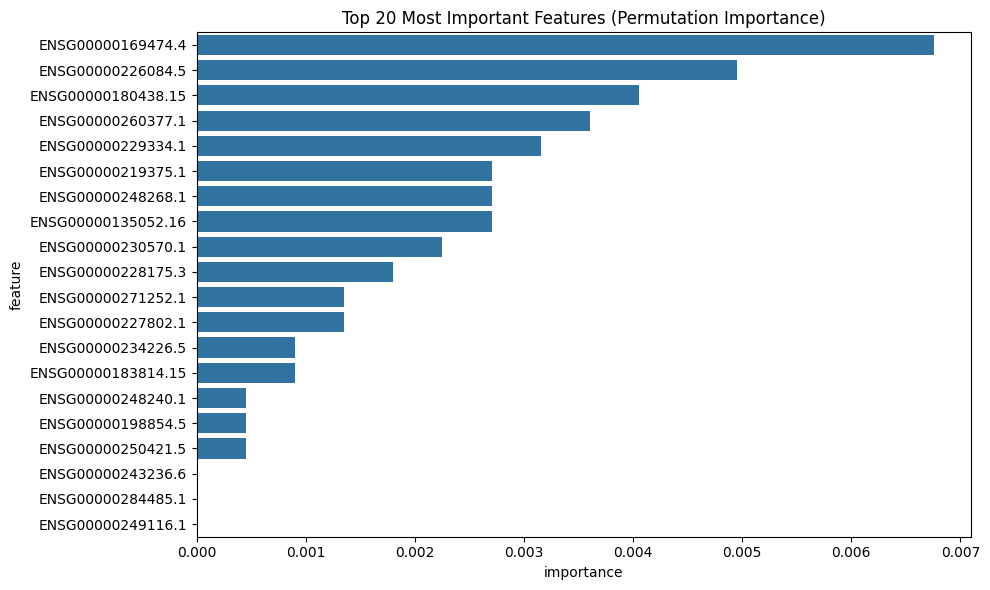

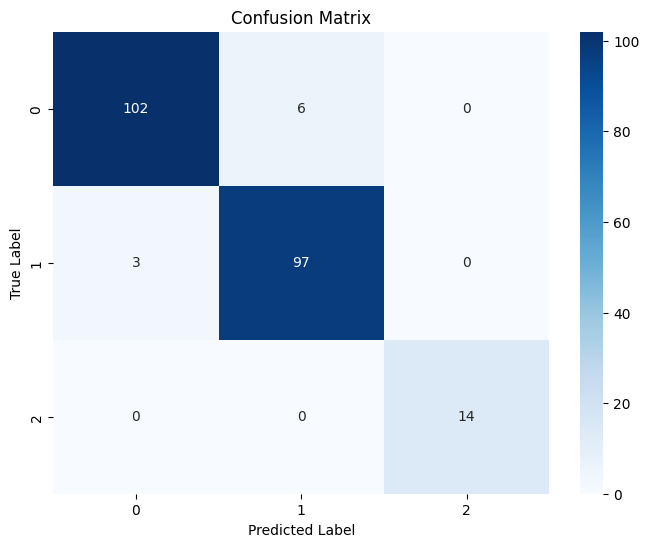

Processing feature set: ../Data/Features/RF_MI_Intersection.csv
Initial model performance:
Accuracy: 0.9640
AUC-ROC: 0.9975
Cross-validation scores: 0.9482 (+/- 0.0279)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.96      0.96      0.96       100
           2       1.00      1.00      1.00        14

    accuracy                           0.96       222
   macro avg       0.97      0.97      0.97       222
weighted avg       0.96      0.96      0.96       222

Best parameters found: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'class_weight': 'balanced', 'C': 1}

Tuned model performance:
Accuracy: 0.9640
AUC-ROC: 0.9976
Cross-validation scores: 0.9470 (+/- 0.0307)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.96      0.96      0.96       100
           2       1.00   

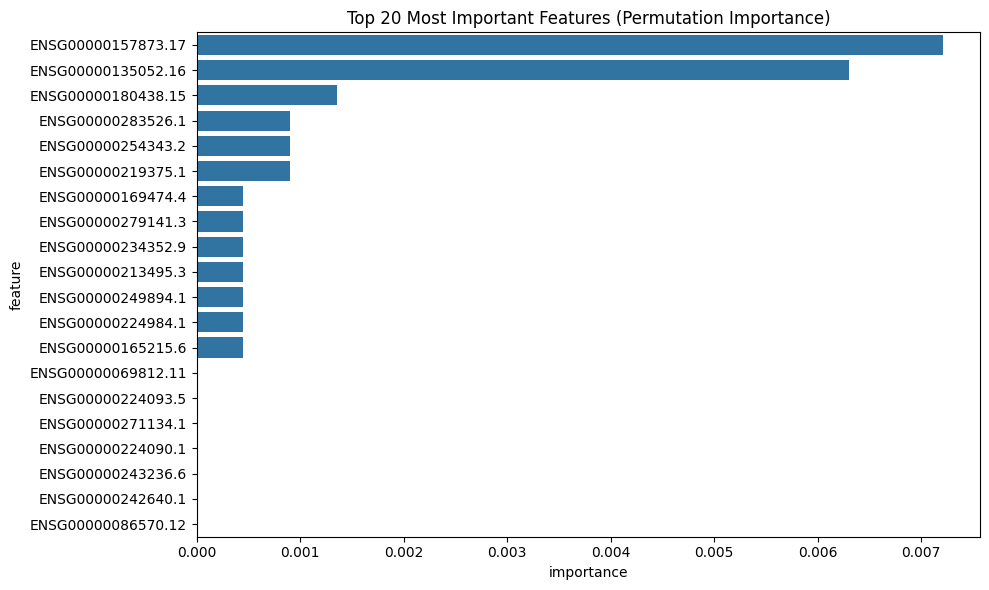

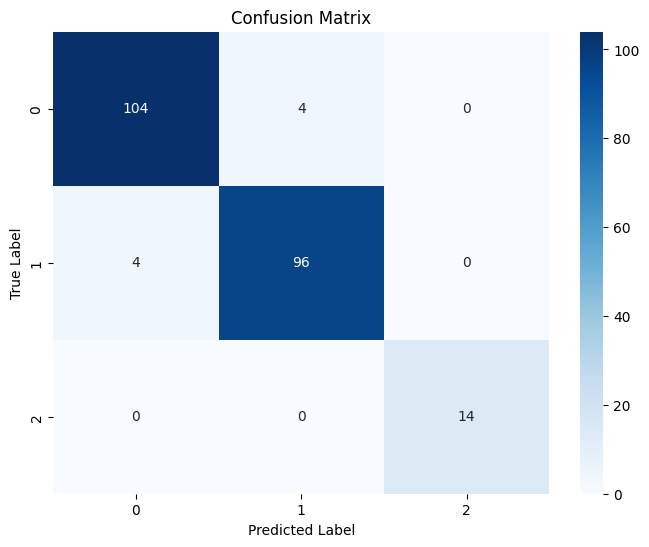

Processing feature set: ../Data/Features/NSCLC_biomarkers_de_analysis.csv
Initial model performance:
Accuracy: 0.9234
AUC-ROC: 0.9830
Cross-validation scores: 0.8997 (+/- 0.0278)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       108
           1       0.92      0.91      0.91       100
           2       1.00      1.00      1.00        14

    accuracy                           0.92       222
   macro avg       0.95      0.95      0.95       222
weighted avg       0.92      0.92      0.92       222

Best parameters found: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'class_weight': None, 'C': 10}

Tuned model performance:
Accuracy: 0.9369
AUC-ROC: 0.9865
Cross-validation scores: 0.8985 (+/- 0.0274)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.93      0.93      0.93       100
           2       1.

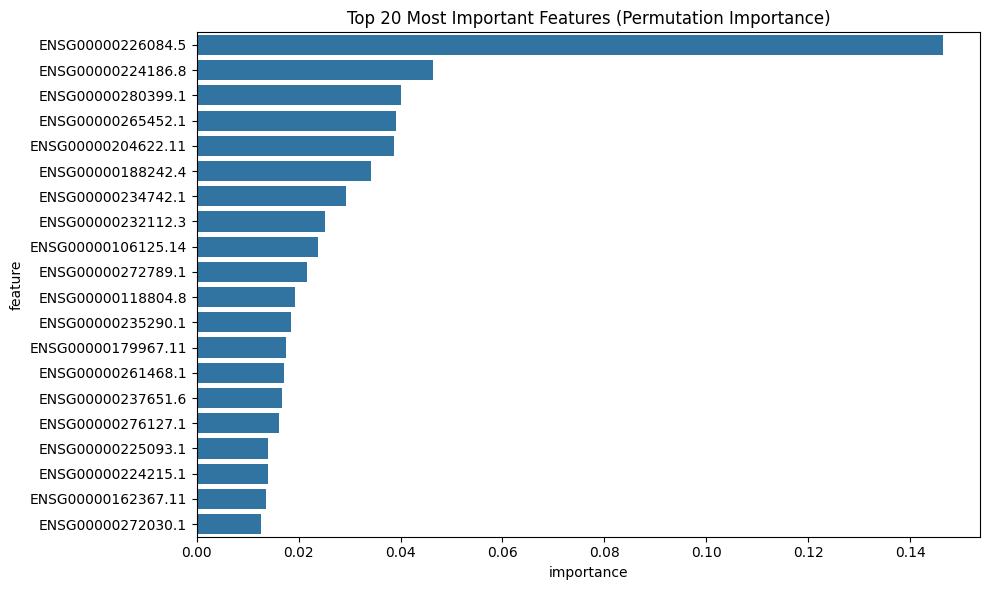

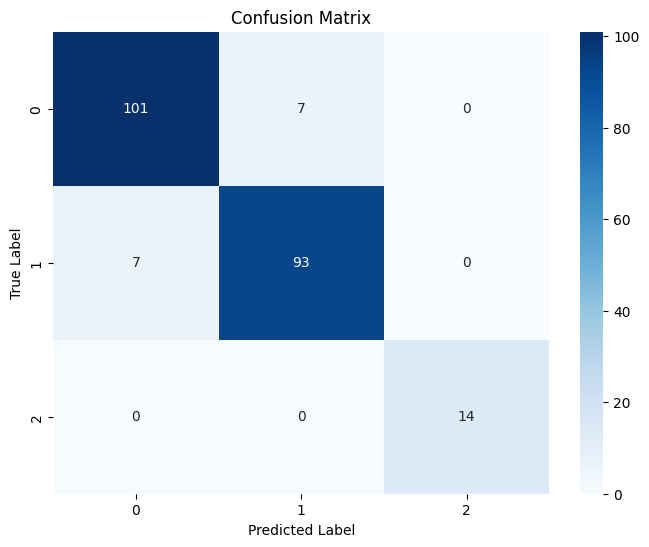

Processing feature set: ../Data/Features/NSCLC_biomarkers_50_de_analysis.csv
Initial model performance:
Accuracy: 0.8919
AUC-ROC: 0.9729
Cross-validation scores: 0.8501 (+/- 0.0216)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       108
           1       0.89      0.87      0.88       100
           2       1.00      1.00      1.00        14

    accuracy                           0.89       222
   macro avg       0.92      0.92      0.92       222
weighted avg       0.89      0.89      0.89       222



In [ ]:
# Main execution
for feature_set in feature_sets:
    print(f"Processing feature set: {feature_set}")
    
    # Load and preprocess data
    X, y = load_data(expression_path, labels_path, feature_set)
    X_train, X_test, y_train, y_test = preprocess_data(X, y)
    
    # Initialize and scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize and train SVM model
    svm = SVC(random_state=42, probability=True)
    svm, initial_metrics = train_and_evaluate_model(svm, X_train_scaled, X_test_scaled, y_train, y_test)
    
    print("Initial model performance:")
    print(f"Accuracy: {initial_metrics['accuracy']:.4f}")
    print(f"AUC-ROC: {initial_metrics['auc_roc']:.4f}")
    print(f"Cross-validation scores: {initial_metrics['cv_scores'].mean():.4f} (+/- {initial_metrics['cv_scores'].std() * 2:.4f})")
    print("\nClassification Report:\n", initial_metrics['classification_report'])
    
    # Hyperparameter tuning
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['rbf', 'linear', 'poly'],
        'gamma': ['scale', 'auto', 0.1, 1],
        'class_weight': [None, 'balanced'],
        'degree': [2, 3, 4],  # Only used by poly kernel
    }
    
    svm_random = RandomizedSearchCV(
        estimator=svm, 
        param_distributions=param_grid, 
        n_iter=100, 
        cv=3, 
        verbose=0, 
        random_state=42, 
        n_jobs=-1,
        error_score='raise')
    
    svm_random.fit(X_train_scaled, y_train)
    
    print("Best parameters found:", svm_random.best_params_)
    
    # Train and evaluate tuned model
    best_svm = svm_random.best_estimator_
    best_svm, tuned_metrics = train_and_evaluate_model(best_svm, X_train_scaled, X_test_scaled, y_train, y_test)
    
    print("\nTuned model performance:")
    print(f"Accuracy: {tuned_metrics['accuracy']:.4f}")
    print(f"AUC-ROC: {tuned_metrics['auc_roc']:.4f}")
    print(f"Cross-validation scores: {tuned_metrics['cv_scores'].mean():.4f} (+/- {tuned_metrics['cv_scores'].std() * 2:.4f})")
    print("\nClassification Report:\n", tuned_metrics['classification_report'])
    
    # Plot feature importance using permutation importance
    perm_importance = permutation_importance(best_svm, X_test_scaled, y_test, n_repeats=10, random_state=42)
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': perm_importance.importances_mean
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
    plt.title('Top 20 Most Important Features (Permutation Importance)')
    plt.tight_layout()
    plt.show()
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, best_svm.predict(X_test_scaled))
    
    # Uncomment the following lines if you want to save the model and feature importance
    # joblib.dump(best_svm, f'best_svm_model_{feature_set}.joblib')
    # feature_importance.to_csv(f'feature_importance_svm_{feature_set}.csv', index=False)
    
    # print(f"Model and feature importance for {feature_set} have been saved.")
    # print("\n" + "="*50 + "\n")